In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

In [2]:
path = '/home/aeb783/HPC-Final-Project/'

Read sgd datasets

In [13]:
n_threads = 8
thread_counts = np.arange(1, n_threads+1)
# thread_counts = 2**np.arange(6, dtype=int)
thread_counts

array([1, 2, 3, 4, 5, 6, 7, 8])

In [14]:
dfs = {
    '{}_threads'.format(i) : pd.read_csv(path + 'output/{}_threads_sgd.csv'.format(i))
    for i in thread_counts
}
dfs['8_threads']

,residual_norm,runtime,flops
0,27407.449219,0.318719,1.581603e+09
1,27407.449219,0.632856,7.965281e+08
2,27407.449219,0.950594,5.302866e+08
3,27407.449219,1.255788,4.014109e+08
4,27407.449219,1.567108,3.216670e+08
...,...,...,...
95,27407.468750,30.151080,1.671870e+07
96,27407.468750,30.461836,1.654815e+07
97,27407.468750,30.775133,1.637969e+07
98,27407.468750,31.084714,1.621656e+07


## Residual norm vs iteration

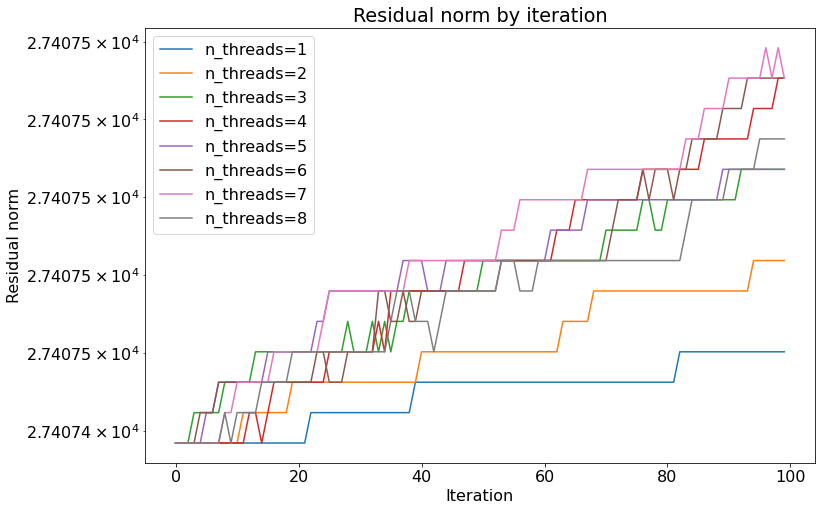

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

for i in thread_counts:
    df = dfs['{}_threads'.format(i)]
    
    ax.semilogy(df['residual_norm'], label='n_threads={}'.format(i))
    
ax.set(
    xlabel='Iteration',
    ylabel='Residual norm',
    title='Residual norm by iteration',
)

ax.legend();

## Residual norm by time

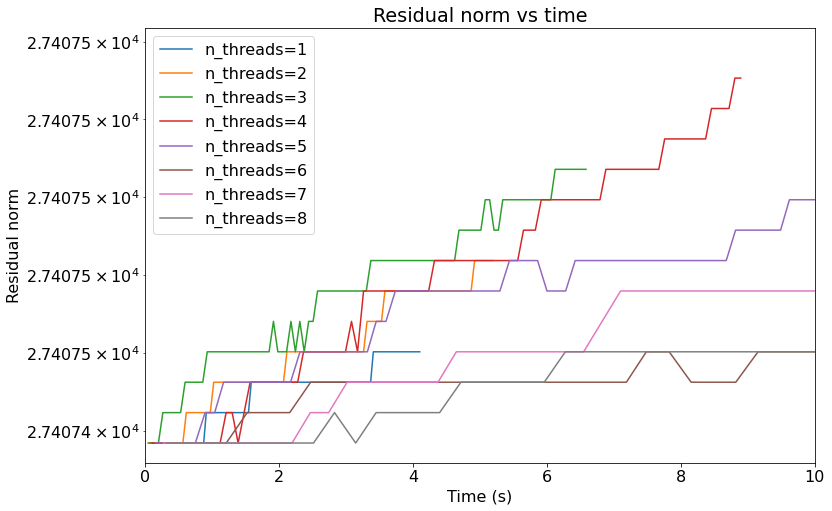

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

for i in thread_counts:
    df = dfs['{}_threads'.format(i)]
    x = df['runtime']
    y = df['residual_norm']
    
    ax.semilogy(x, y, label='n_threads={}'.format(i))
    
ax.set(
    xlabel='Time (s)',
    ylabel='Residual norm',
    title='Residual norm vs time',
    xlim=(0,10)
)

ax.legend();

## Time for convergence

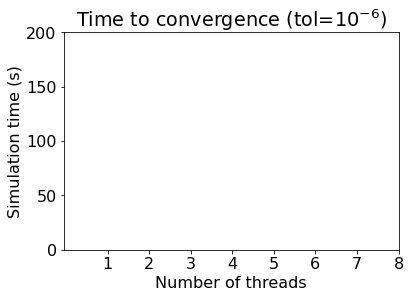

In [8]:
plt.plot();
plt.xticks(thread_counts);
plt.ylim(0,200);
plt.xlabel('Number of threads');
plt.ylabel('Simulation time (s)');
plt.title(r'Time to convergence (tol=$10^{-6}$)');